Camada Física da Computação 2020/2

Aula 14  - **Prática em Fourier**

Rodrigo Carareto rodrigoc5@insper.edu.br

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift

In [2]:
def generateSin(freq, time, fs):
    n = time*fs #numero de pontos
    x = np.linspace(0.0, time, n)  # eixo do tempo
    s = np.sin(freq*x*2*np.pi)
    plt.figure()
    plt.plot(x,s)
    return (x, s)

In [3]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

## Propriedades dos sinais 

In [4]:
fs  = 200   # pontos por segundo (frequência de amostragem)
A   = 1.5   # Amplitude
F   = 1     # Hz
T   = 4     # Tempo em que o seno será gerado
t   = np.linspace(-T/2,T/2,T*fs)

# Prática em Fourier

## Senoide única

 - Gere uma senoide de 5Hz 

### Para analisar :

 - Exiba o sinal no tempo e o Fourier do mesmo (módulo e fase)
 - Analíse a composição espectal desse sinal.
 - Calcule a banda do sinal

<StemContainer object of 3 artists>

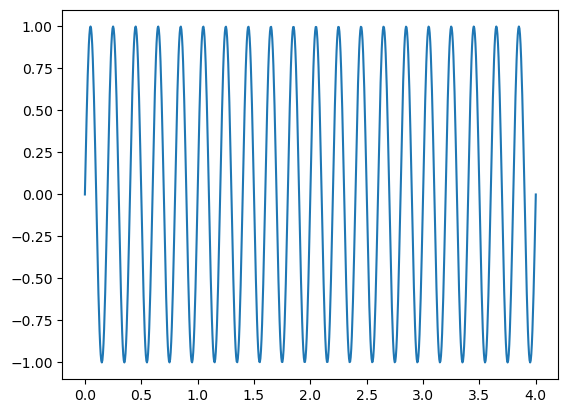

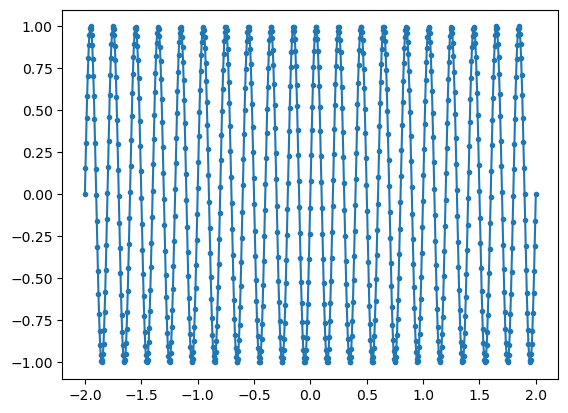

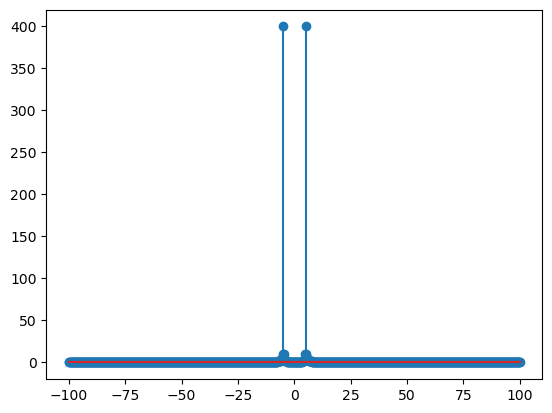

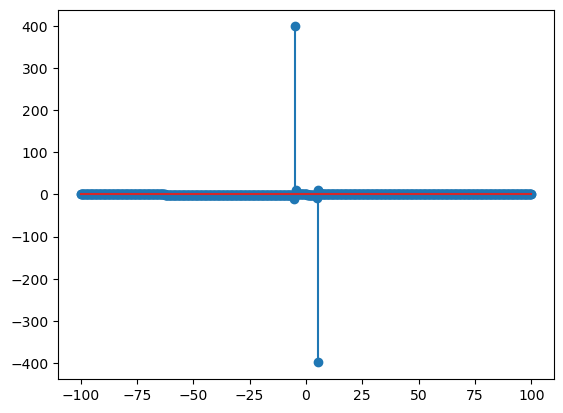

In [5]:
x, y = generateSin(5,T,fs)
plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X,np.abs(Y))

plt.figure()
plt.stem(X,np.imag(Y))

## Senoides 

 - Gere duas senoide de mesma amplitude e frequência 5Hz e 8Hz
 
### Para analisar :
 
 - Exiba o sinal no tempo e o Fourier do mesmo (módulo)
 - Analíse a composição espectal desse sinal.


(-15.0, 15.0)

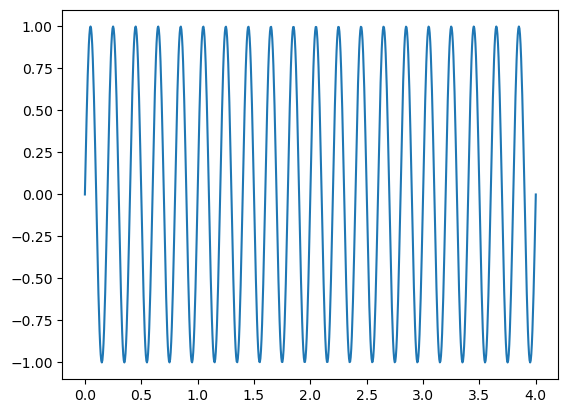

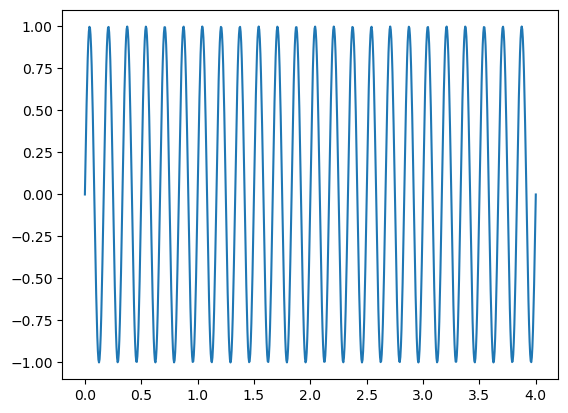

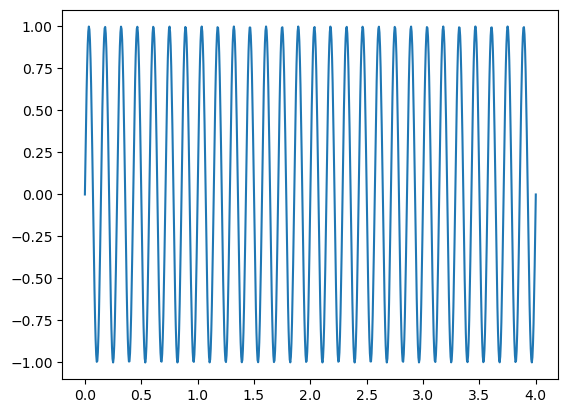

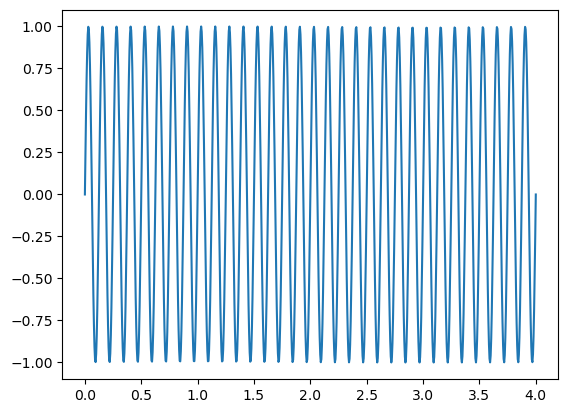

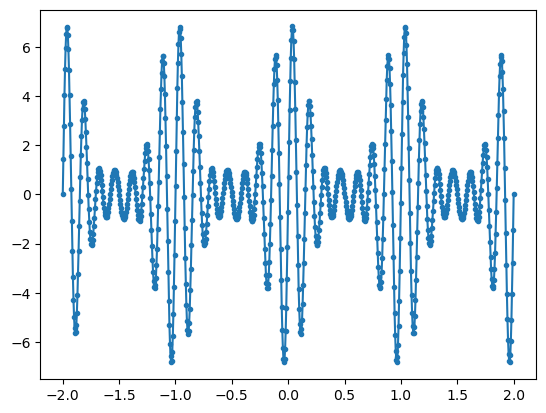

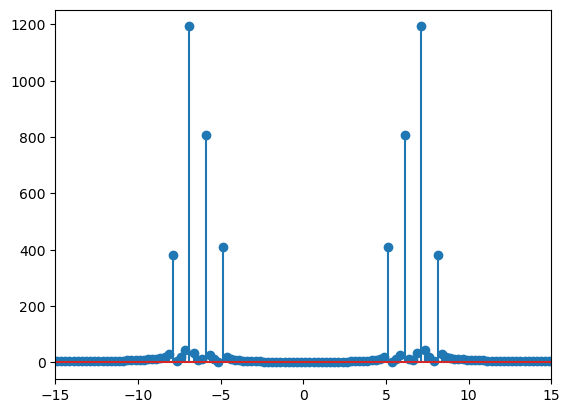

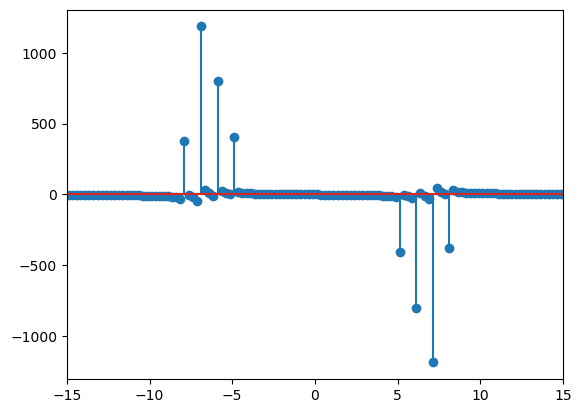

In [6]:
x1, y1 = generateSin(5,T,fs)
x2, y2 = generateSin(6,T,fs)
x3, y3 = generateSin(7,T,fs)
x4, y4 = generateSin(8,T,fs)
y=y1 + 2*y2 + 3*y3 + y4
plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X,np.abs(Y))
plt.xlim(-15, 15)

plt.figure()
plt.stem(X,np.imag(Y))
plt.xlim(-15, 15)

## Onda Quadrada nivel DC = 0

 - Gere uma onda quadrada em torno do eixo X de amplitude 3 e frequência 1Hz 
     - dica : signal.square 
     
### Para analisar :
 
 - Exiba o sinal no tempo e o Fourier do mesmo (módulo e fase)
 - Analíse a composição espectal desse sinal.
 


<StemContainer object of 3 artists>

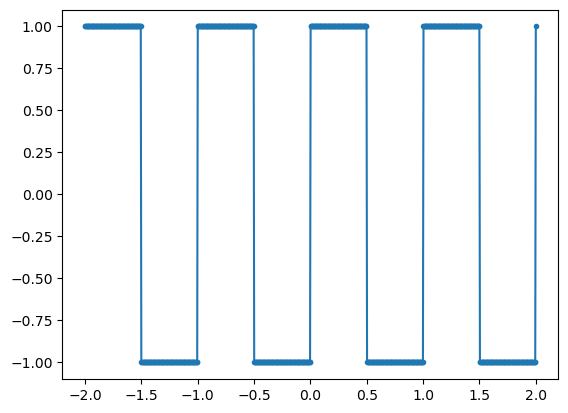

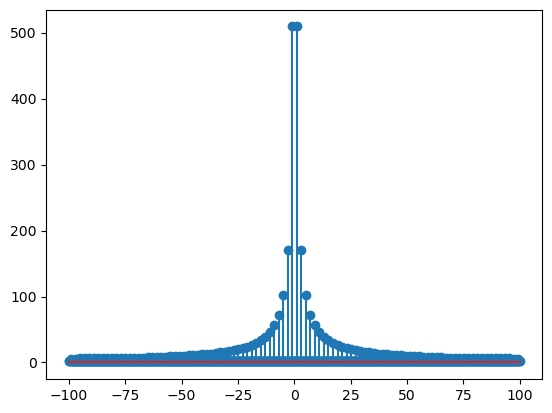

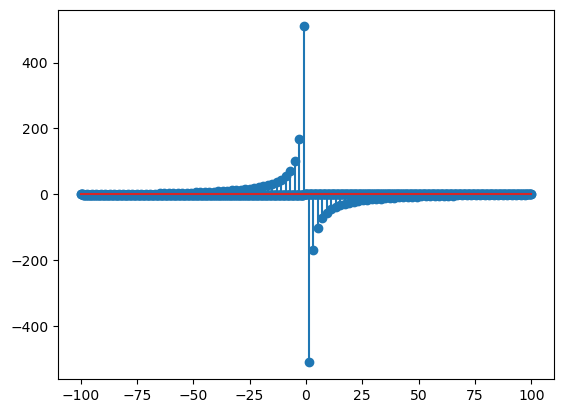

In [7]:
y = signal.square(2 * np.pi * 1 * t, 0.5)
plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X,np.abs(Y))

plt.figure()
plt.stem(X,np.imag(Y))



## Pulso

 - Gere um pulso em torno da origem de duração (1.5s, 1s, 0.5s, 0.025s)
     - dica : signal.square 
     
### Para analisar
     
 - Exiba o sinal no tempo e o Fourier dos sinais (módulo )
 - Analíse a composição espectal dos pulsos (com duração distintas)
 - Calcule as bandas dos sinais


(-20.0, 20.0)

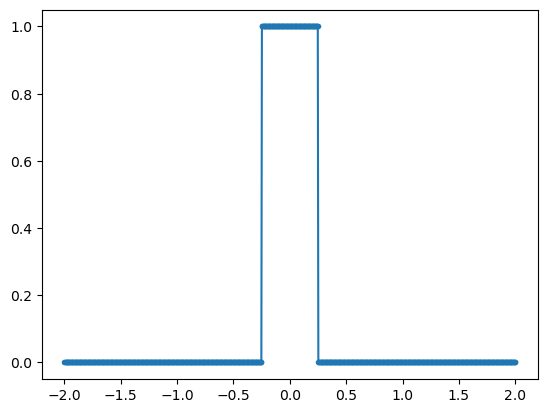

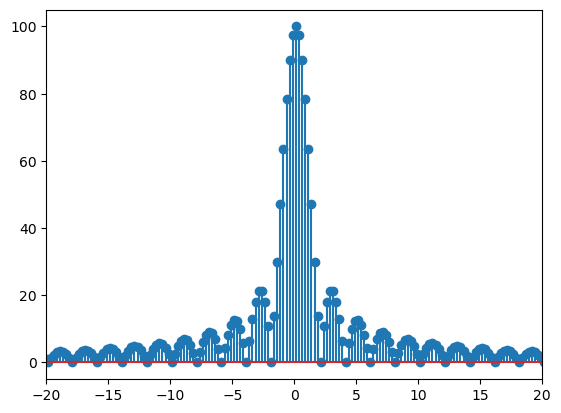

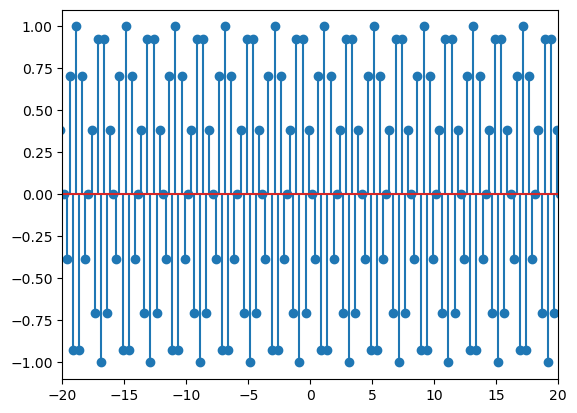

In [8]:
y1 = signal.square(2 * np.pi * 1/3 * (t+.75), 0.5)
y2 = signal.square(2 * np.pi * .5 * (t+.5), 0.5)
y3 = signal.square(2 * np.pi * 1 * (t+.25), 0.5)
y4 = signal.square(2 * np.pi * 20 * (t+.05/4), 0.5)

for x in range(len(t)):
    if(t[x]>.5 or t[x]<-.5):
        y2[x]=0
    if(t[x]>.25 or t[x]<-.25):
        y3[x]=0
    if(t[x]>.0125 or t[x]<-.0125):
        y4[x]=0

#seleciona 1
y=y3
#######

plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X,np.abs(Y))
plt.xlim(-20,20)

plt.figure()
plt.stem(X,np.imag(Y))
plt.xlim(-20,20)



## FFT PYTHON
Vamos testar o algoritmo FFT do python e a função de localizar picos. Para isso, inicialmente, grave um arquivo de audio de poucos segundos. Em seguida, importe e execute esse audio. Altere a taxa de amostragem e veja o que ocorre. Tente entender.

In [9]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile   as sf


#leituara do arquivo audio
fs = 44100   # taxqa de amostagem (sample rate)
sd.default.samplerate = fs
sd.default.channels = 1
audio, samplerate = sf.read('camFis.wav')
yAudio = audio[:,1]
samplesAudio = len(yAudio)
sd.play(audio)
sd.wait()




ModuleNotFoundError: No module named 'suaBibSignal'

Plot o gráfico do sinal no tempo. 

Text(0.5,1,'Oi no tempo')

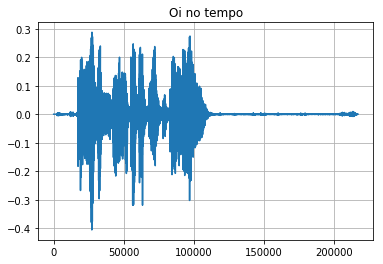

In [10]:
plt.plot(yAudio)
plt.grid()
plt.title('Oi no tempo')

Obtenha transformada de Fourier do arquivo, mostre o gráfico dos módulos.

(0, 600)

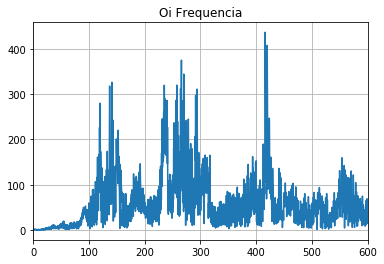

In [11]:
X, Y = calcFFT(yAudio, samplerate)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Oi Frequencia')
plt.xlim(0,600)

Obtenha as 5 frequências mais presentes na composição do sinal.

In [12]:
import peakutils
index = peakutils.indexes(np.abs(Y), thres=0.8, min_dist=20)
print("index de picos {}" .format(index))
for freq in X[index]:
    print("freq de pico sao {}" .format(freq))


index de picos [106663 107342 109746 110425]
freq de pico sao -415.7964318452978
freq de pico sao -265.6630751726261
freq de pico sao 265.88418468171585
freq de pico sao 416.0175413543875
